## To Create Notebook 
<p> To create the new notebook command <b> CTRL+SHIFT+P </b>  
</p>

## To create paragrah and bold 
<p> This is paragraph (To edit Click the text and then click the pen icon on the right side of this box) </p>
<b> This is bold </b>

## STEP 1
<p> <b> 1: Import necessary libraries </b></p>

In [1]:
import pandas as pd  # for data reading
import matplotlib.pyplot as plt # for visulization
from mlxtend.frequent_patterns import apriori, association_rules #Association Rule -> to install library run in the terminal "pip install mlxtend"

## STEP 2
<p> <b> Load Dataset </b></p>

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

# one_data = data[data['y'] == '1']
# one_data.shape
# one_data.head()

## STEP 3
<p><b>
Read Dataset
</b></p>

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 4
<p><b>
Data Preprocessing : Select relevant columns for association rule mining
</b></p>

In [4]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data[categorical_columns])
print(data_encoded.shape)

(41188, 50)


## Step 5
<p><b>
Read Encoded Dataset
</b></p>

In [5]:
data_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


## Step 6
<p><b>
Apply Apriori Algorithm to find frequent itemsets
</b></p>

In [6]:
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)

## Step 7
<p><b>
Display the frequent itemsets
</b></p>

In [7]:
# frequent_itemsets.head(30) # remove '#' if u want to show 30 rows
frequent_itemsets.head()

,support,itemsets
0,0.253035,(job_admin.)
1,0.224677,(job_blue-collar)
2,0.070992,(job_management)
3,0.096363,(job_services)
4,0.163713,(job_technician)


## Step 8
<p><b>
Generate the association rules from the frequent itemsets
</b></p>

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

## Step 9
<p><b>
Display the association rules
</b></p>

In [9]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(job_admin.),(marital_single),0.253035,0.280859,0.094081,0.371810,1.323833,0.023014,1.144783,0.327482
1,(marital_single),(job_admin.),0.280859,0.253035,0.094081,0.334976,1.323833,0.023014,1.123215,0.340152
2,(job_admin.),(education_high.school),0.253035,0.231014,0.080825,0.319420,1.382689,0.022370,1.129899,0.370528
3,(education_high.school),(job_admin.),0.231014,0.253035,0.080825,0.349869,1.382689,0.022370,1.148945,0.359918
4,(job_admin.),(education_university.degree),0.253035,0.295426,0.139677,0.552005,1.868507,0.064924,1.572729,0.622269


## Step 10
<p><b>
Interpretation 1 : Filter rules with high confidence and lift for better interpretability
</b></p>

In [10]:
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.5)]

# Display the strong rules
strong_rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(job_management),(education_university.degree),0.070992,0.295426,0.050087,0.705540,2.388215,0.029115,2.392770,0.625696
32,(job_services),(education_high.school),0.096363,0.231014,0.065116,0.675737,2.925092,0.042855,2.371489,0.728313
38,(education_professional.course),(job_technician),0.127294,0.163713,0.080606,0.633225,3.867905,0.059766,2.280111,0.849613
192,(month_aug),(contact_cellular),0.149995,0.634748,0.143464,0.956458,1.506832,0.048255,8.388576,0.395711
205,(month_jun),(contact_telephone),0.129115,0.365252,0.109207,0.845807,2.315680,0.062047,4.116573,0.652396
...,...,...,...,...,...,...,...,...,...,...
4532,"(housing_yes, month_may, poutcome_nonexistent,...",(contact_telephone),0.117510,0.365252,0.076357,0.649793,1.779028,0.033436,1.812496,0.496204
4558,"(marital_married, loan_no, housing_no, poutcom...",(contact_telephone),0.074803,0.365252,0.057760,0.772152,2.114025,0.030437,2.785838,0.569575
4565,"(housing_no, month_may, marital_married, loan_no)","(contact_telephone, poutcome_nonexistent)",0.084661,0.355468,0.057760,0.682248,1.919298,0.027665,2.028416,0.523277
4570,"(housing_no, marital_married, poutcome_nonexis...","(contact_telephone, loan_no)",0.086457,0.301738,0.057760,0.668071,2.214073,0.031672,2.103646,0.600239


<p> <b>Interpretation 2 : Analysis and interpretation of the rules</b> </p>

In [11]:
# Analysis and interpretation of the rules
# Select and interpret some of the strongest rules
# Rule analysis
for index, rule in strong_rules.iterrows():
    print(f"Rule {index + 1}")
    print(f"Antecedents: {rule['antecedents']}")
    print(f"Consequents: {rule['consequents']}")
    print(f"Support: {rule['support']:.2f}")
    print(f"Confidence: {rule['confidence']:.2f}")
    print(f"Lift: {rule['lift']:.2f}")
    print("--------------------------------------------------")

Rule 30
Antecedents: frozenset({'job_management'})
Consequents: frozenset({'education_university.degree'})
Support: 0.05
Confidence: 0.71
Lift: 2.39
--------------------------------------------------
Rule 33
Antecedents: frozenset({'job_services'})
Consequents: frozenset({'education_high.school'})
Support: 0.07
Confidence: 0.68
Lift: 2.93
--------------------------------------------------
Rule 39
Antecedents: frozenset({'education_professional.course'})
Consequents: frozenset({'job_technician'})
Support: 0.08
Confidence: 0.63
Lift: 3.87
--------------------------------------------------
Rule 193
Antecedents: frozenset({'month_aug'})
Consequents: frozenset({'contact_cellular'})
Support: 0.14
Confidence: 0.96
Lift: 1.51
--------------------------------------------------
Rule 206
Antecedents: frozenset({'month_jun'})
Consequents: frozenset({'contact_telephone'})
Support: 0.11
Confidence: 0.85
Lift: 2.32
--------------------------------------------------
Rule 244
Antecedents: frozenset({'j

## Step 11
<p><b>
Demographic visualization using Matplotlib
</b></p>
<p><b>
Distribution of Age types
</b></p>

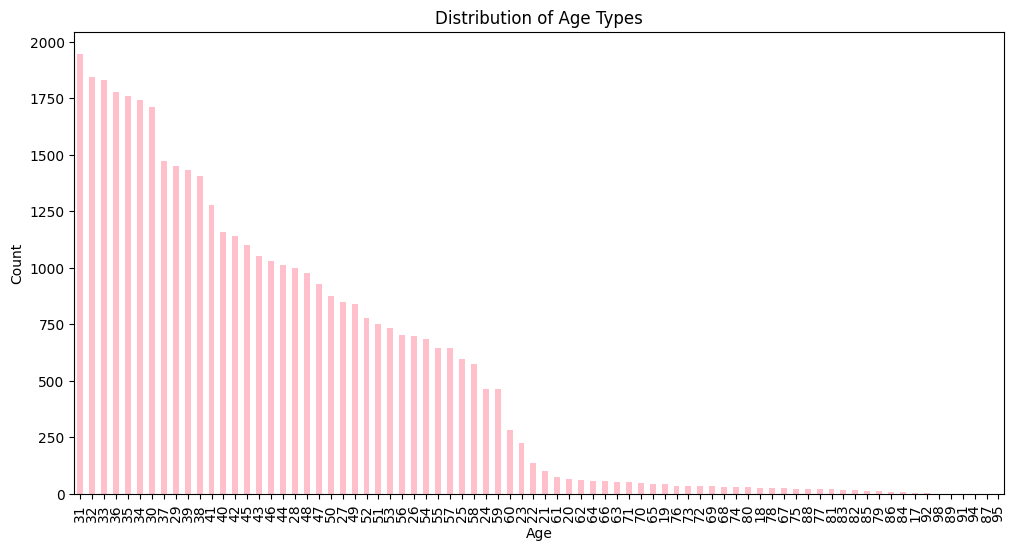

In [27]:
plt.figure(figsize=(12, 6))
data['age'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Age Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<p><b>
Distribution of Day of Week types
</b></p>

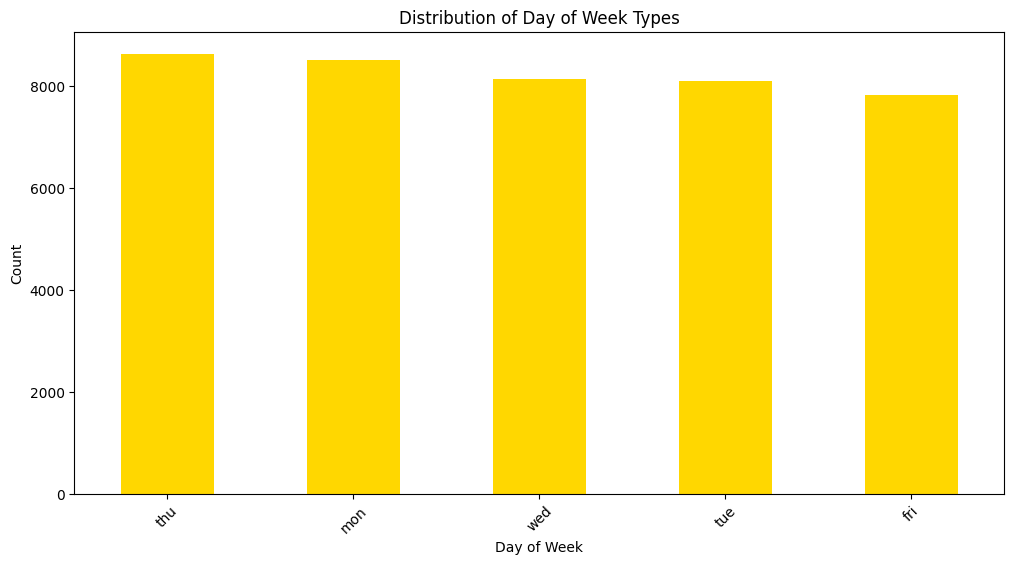

In [26]:
plt.figure(figsize=(12, 6))
data['day_of_week'].value_counts().plot(kind='bar', color='gold')
plt.title('Distribution of Day of Week Types')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Contact types
</b></p>

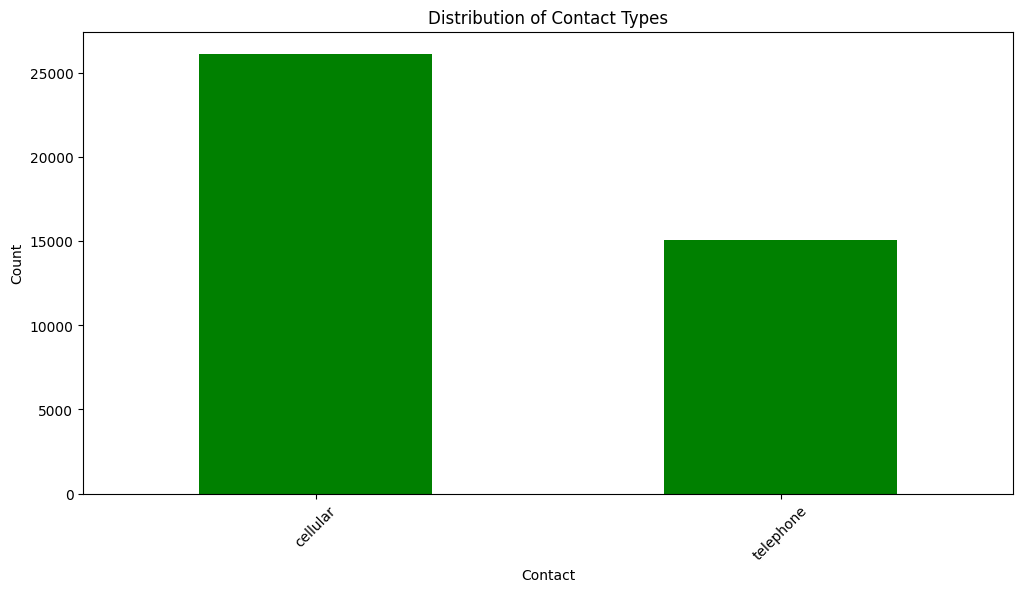

In [25]:
plt.figure(figsize=(12, 6))
data['contact'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Contact Types')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Duration types
</b></p>

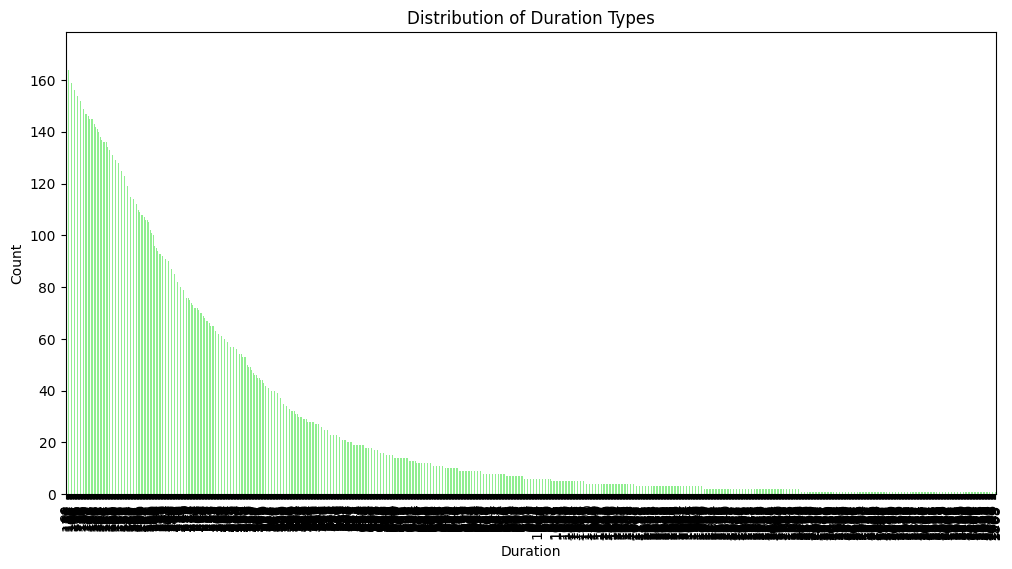

In [24]:
plt.figure(figsize=(12, 6))
data['duration'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Duration Types')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<p><b>
Distribution of Day of poutcome types
</b></p>

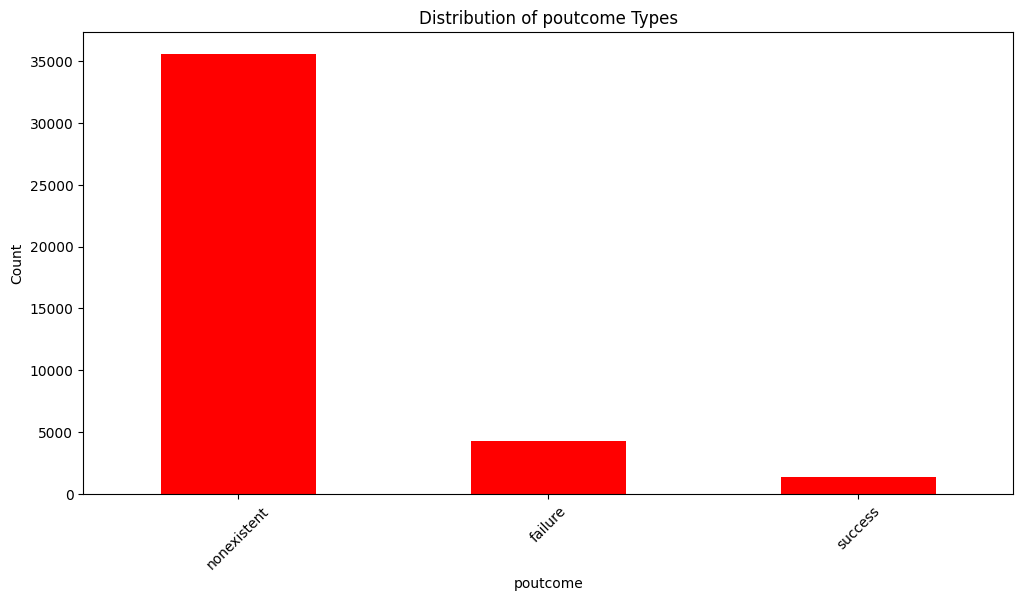

In [23]:
plt.figure(figsize=(12, 6))
data['poutcome'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of poutcome Types')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of job types
</b></p>

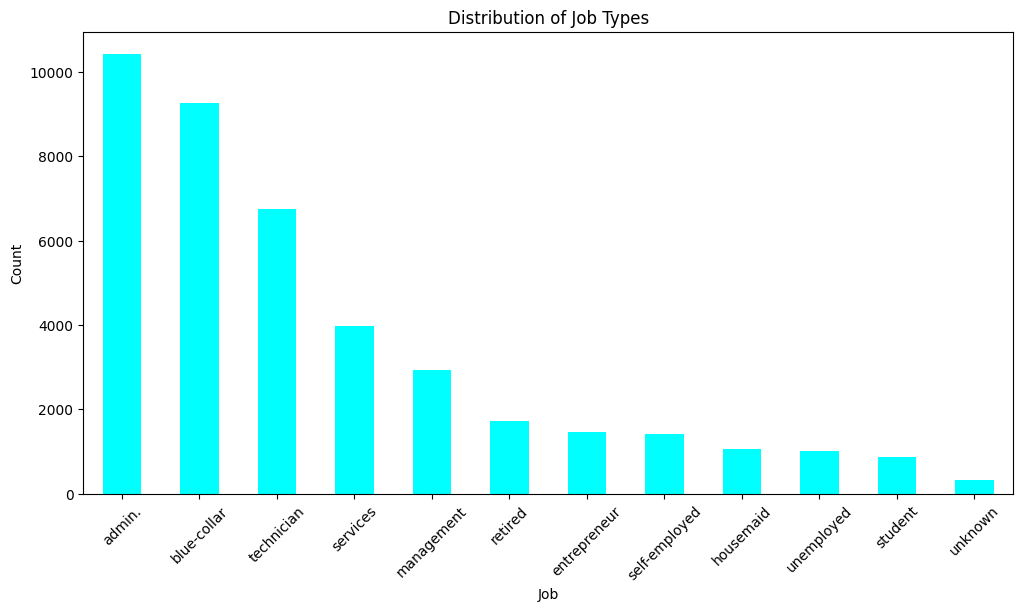

In [22]:
plt.figure(figsize=(12, 6))
data['job'].value_counts().plot(kind='bar', color='cyan')
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of marital status
</b></p>

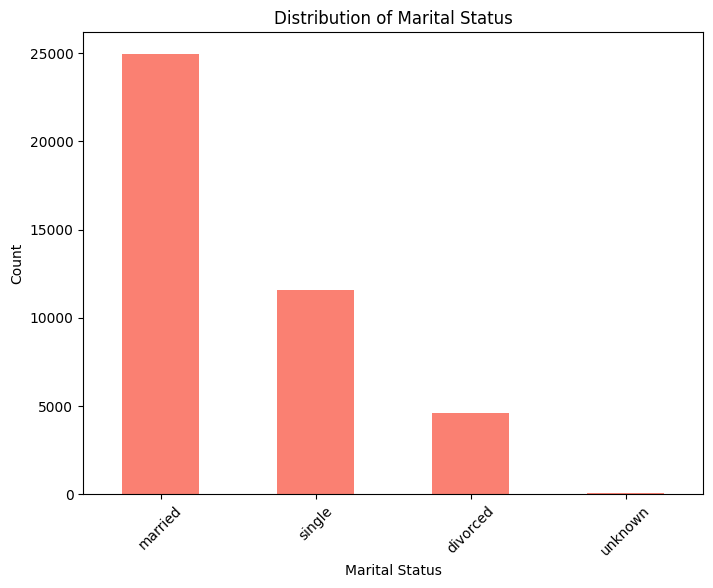

In [18]:
plt.figure(figsize=(8, 6))
data['marital'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of education levels
</b></p>

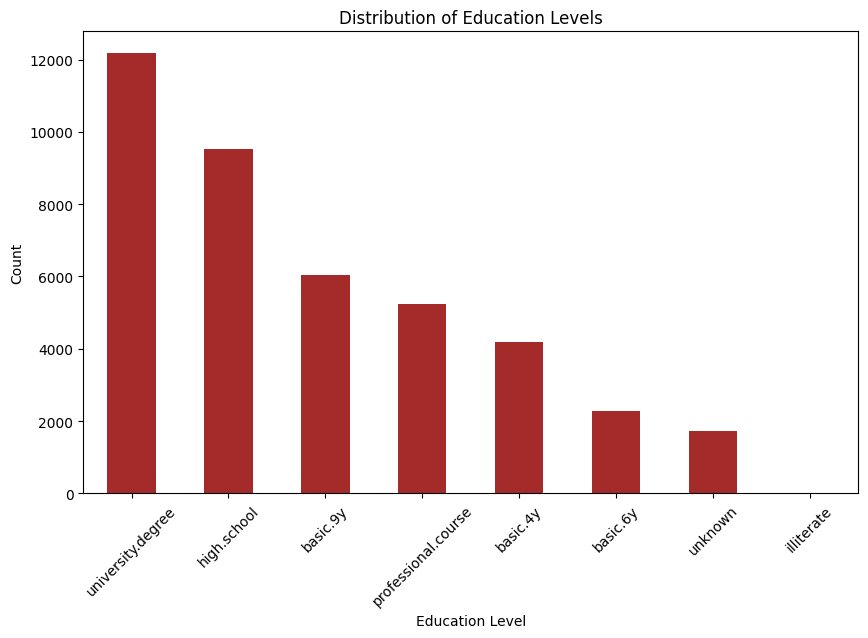

In [28]:
plt.figure(figsize=(10, 6))
data['education'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()